In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("FLETES LARRAZ 2024.xlsx", sheet_name="ENERO 2025")

df.drop(0,inplace=True)
df.drop(1,inplace=True)
df.drop(3,inplace=True)
df.drop(4,inplace=True)
df.drop(columns="Unnamed: 0",inplace=True)
df.drop(columns="Unnamed: 11",inplace=True)
df.drop(columns="Unnamed: 12",inplace=True)
df.drop(columns="Unnamed: 13",inplace=True)
df.drop(columns="Unnamed: 15",inplace=True)
df.drop(columns="Unnamed: 16",inplace=True)

df= df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)

df = df.drop(df.columns[-2:], axis=1)

df = df[df["PRECIO-FLETE"]!=0]

df['nro-camion'] = df['FECHA'].notna().cumsum()

columnas_nuevo_orden = ['nro-camion', 'FECHA', 'PLANILLA', 'CAMIÓN', 'CLIENTE', 'BULTOS', 'LOCALIDAD', 'EXPRESO ', 'REMITOS', 'PRECIO-FLETE', 'PRECIO-OTROS', 'VALOR DECLARADO']
df = df[columnas_nuevo_orden]

In [2]:
promedio_precio = df.groupby("nro-camion")["PRECIO-FLETE"].transform("mean")
df["PROMEDIO POR CAMION"] = promedio_precio

In [3]:
localidades = df.value_counts("LOCALIDAD")
df_localidades= localidades.to_frame(name="VIAJES")
df_localidades["COSTO TOTAL"] = df.groupby("LOCALIDAD")["PROMEDIO POR CAMION"].agg("sum")

In [4]:
df_localidades["COSTO POR VIAJE"] = df_localidades["COSTO TOTAL"]/df_localidades["VIAJES"]

C:\Users\User\AppData\Local\Temp\ipykernel_21988\3726458961.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_localidades["LOCALIDAD"], rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_21988\3726458961.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)


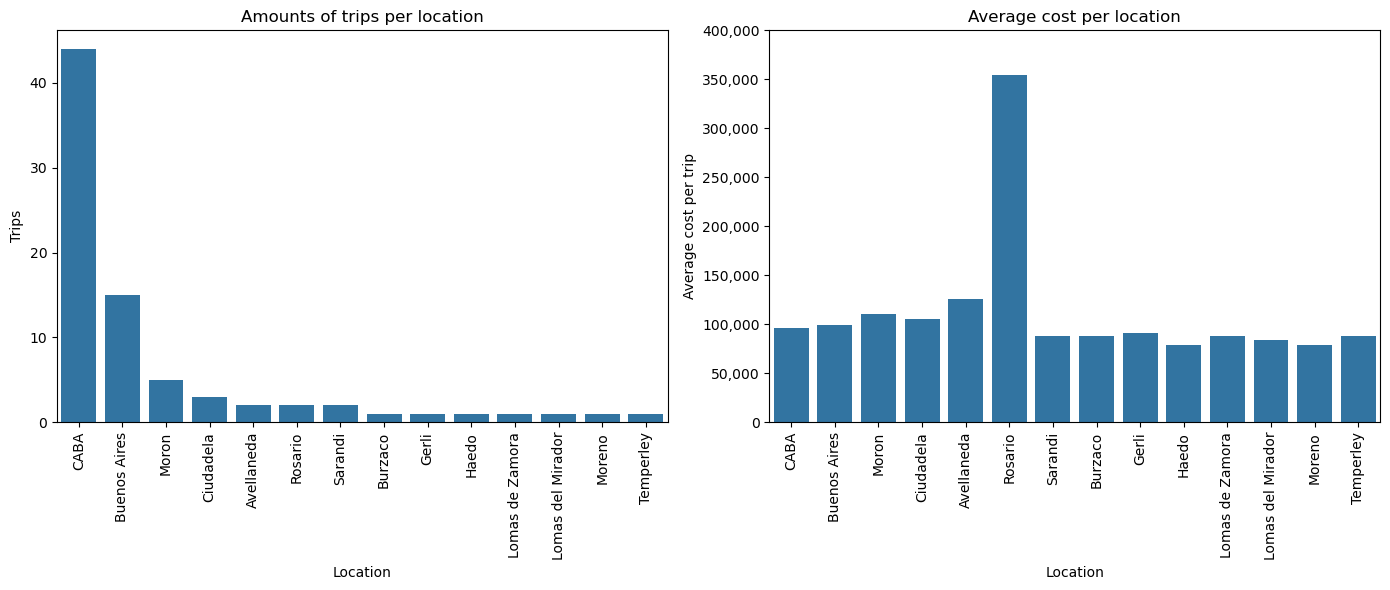

In [6]:
import matplotlib.ticker as mticker

df_localidades.reset_index(inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

sns.barplot(data=df_localidades, x="LOCALIDAD", y="VIAJES", ax=ax[0])
ax[0].set_title("Amounts of trips per location")
ax[0].set_xticklabels(df_localidades["LOCALIDAD"], rotation=90)
ax[0].set_ylabel("Trips")
ax[0].set_xlabel("Location")


sns.barplot(x="LOCALIDAD", y="COSTO POR VIAJE", data=df_localidades, ax=ax[1])
ax[1].set_title("Average cost per location")
ax[1].set_xticklabels(df_localidades["LOCALIDAD"].unique(), rotation=90)
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax[1].set_ylim(0,400000)
ax[1].set_ylabel("Average cost per trip")
ax[1].set_xlabel("Location")

plt.tight_layout()
plt.show()